In [98]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib widget

In [99]:
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

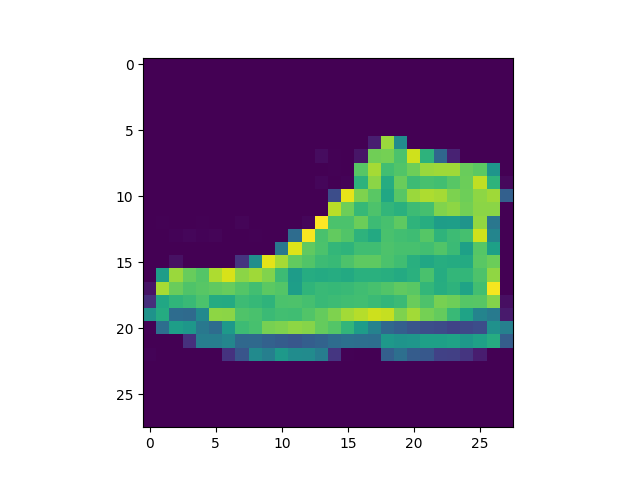

9


In [100]:
test_images[0]

plt.close()
plt.imshow(train_images[89])
plt.show()
print(train_labels[89])

In [101]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [102]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [103]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])



model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [104]:
h = model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4951 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3721 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3112 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2924 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2697 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2471 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [105]:
out1= model.predict(test_images)

313/313 [==============================] - 0s 562us/step


In [106]:
out1[111]

array([ -7.069827 , -25.334246 ,  -9.6838045, -25.866915 ,  -6.37298  ,
         6.540673 ,  -9.961387 ,  -3.5205107, -10.411304 , -14.59466  ],
      dtype=float32)

In [107]:
class_names[test_labels[111]]

'Sandal'

In [108]:
from keras_visualizer import visualizer

visualizer(model, file_name='model',file_format='png')

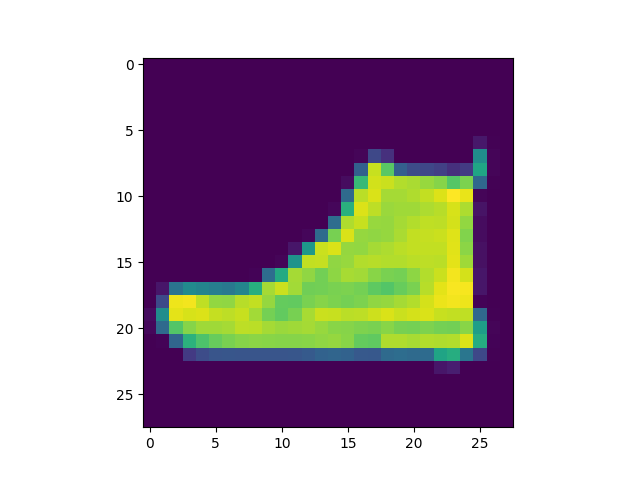

In [119]:
plt.close()
plt.imshow(img)
plt.show()

In [143]:
import numpy as np
import cv2

img=cv2.imread('test.png')
img=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
img2 = np.array([img])
img2=img2/255
out2=model.predict(img2)

1/1 [==============================] - 0s 12ms/step


In [144]:
out2 = np.argmax(out2)
print(class_names[out2])

Ankle boot
